In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from scikitlearn.cross_validation import train_test_split
%matplotlib inline


In [2]:
EPL_combined = pd.read_csv('C:\\Users\\91997\\EPLcombined.csv')

In [3]:
SerieA_combined = pd.read_csv('C:\\Users\\91997\\SerieAcombined.csv')

In [4]:
Bundesliga_combined = pd.read_csv('C:\\Users\\91997\\Bundesligacombined.csv')

In [5]:
Laliga_combined = pd.read_csv('C:\\Users\\91997\\Laligacombined.csv')

In [6]:
Ligue1_combined = pd.read_csv('C:\\Users\\91997\\Ligue1combined.csv')

In [7]:
EPL_combined_copy = EPL_combined

In [8]:
SerieA_combined_copy = SerieA_combined 

In [9]:
Bundesliga_combined_copy = Bundesliga_combined

In [10]:
Laliga_combined_copy = Laliga_combined

In [11]:
Ligue1_combined_copy = Ligue1_combined

In [12]:
EPLSerieA = EPL_combined_copy.append(SerieA_combined_copy,ignore_index = True)

In [13]:
print(len(EPLSerieA['Player Name'].unique()))

291


In [14]:
AllData = EPLSerieA.append([Bundesliga_combined_copy,Laliga_combined_copy,Ligue1_combined_copy],ignore_index = True)

In [15]:
print(len(AllData['PlayerID'].unique()))

745


In [16]:
AllData.drop('Unnamed: 0',axis = 1,inplace = True)

In [17]:
AllData.shape

(745, 8)

In [18]:
AllData.to_csv('AllLeagueData.csv')

In [19]:
nan_rows = AllData[AllData['Club'].isnull()]
print(nan_rows)

       Player Name PlayerID Club  Goals  Assists Minutes Played  SOG  Shots
565  Ruben Sobrino     Rube  NaN      3        1              -    5     13


In [20]:
print(AllData.isnull().any().any())

True


In [21]:
AllData.dropna(inplace = True)
AllData.shape

(744, 8)

In [22]:
AllData.reset_index(drop = True,inplace = True)

In [23]:
#print(AllData['Club'].unique())

In [24]:
def Club_name(row):
    if row['Club'] == 'CHE':
        val = 'Chelsea'
    if row['Club'] == 'TOT':
        val = 'Tottenham'
    if row['Club'] == 'BOU':
        val = 'Bournemouth'
    if row['Club'] == 'MCI':
        val = 'Manchester City'
    if row['Club'] == 'MUN':
        val = 'Manchester United'
    if row['Club'] == 'LIV':
        val = 'Liverpool'
    if row['Club'] == 'ARS':
        val = 'Arsenal'
    if row['Club'] == 'FUL':
        val = 'Fulham'
    if row['Club'] == 'WLV':
        val = 'Wolverhampton'
    if row['Club'] == 'LEI':
        val = 'Leicester City'
    if row['Club'] == 'CRY':
        val = 'Crystal Palace'
    if row['Club'] == 'WHU':
        val = 'West Ham United'
    if row['Club'] == 'NEW':
        val = 'Newcastle United'
    if row['Club'] == 'EVE':
        val = 'Everton'
    if row['Club'] == 'SOU':
        val = 'Southampton'
    if row['Club'] == 'HUD':
        val = 'Huddersfield Town'
    if row['Club'] == 'CC\r\r\n':
        val = 'Cardiff City'
    if row['Club'] == 'SPL':
        val = 'Spal'
    if row['Club'] == 'SMP':
        val = 'Sampdoria'
    if row['Club'] == 'JUV':
        val = 'Juventus'
    if row['Club'] == 'FIO':
        val = 'Fiorentina'
    if row['Club'] == 'ROM':
        val = 'Roma'
    if row['Club'] == 'LAZ':
        val = 'Lazio'
    if row['Club'] == 'GEN':
        val = 'Genoa'
    if row['Club'] == 'SAS':
        val = 'Sassuolo'
    if row['Club'] == 'INT':
        val = 'Inter Milan'
    if row['Club'] == 'EMP':
        val = 'Empoli'
    if row['Club'] == 'CAG':
        val = 'Cagliari'
    if row['Club'] == 'PAR':
        val = 'Parma'
    if row['Club'] == 'FRO':
        val = 'Frosinone'
    if row['Club'] == 'CHV':
        val = 'Chievo Verona'
    if row['Club'] == 'BUR':
        val = 'Burnley'
    if row['Club'] == 'BHA':
        val = 'Brighton'
    if row['Club'] == 'WAT':
        val = 'Watford'
    if row['Club'] == 'ATA':
        val = 'Atalanta'
    if row['Club'] == 'NAP':
        val = 'Napoli'
    if row['Club'] == 'MIL':
        val = 'Ac Milan'
    if row['Club'] == 'BGN':
        val = 'Bologna'
    if row['Club'] == 'UDN':
        val = 'Udinese'
    if row['Club'] == 'TOR':
        val = 'Torino'
    if row['Club'] == 'DOR':
        val = 'Dortmund'
    if row['Club'] == 'LEV':
        val = 'Bayer Leverkusen'
    if row['Club'] == 'BM\r\r\n':
        val = 'Monchengladbach'
    if row['Club'] == 'EF\r\r\n':
        val = 'Eintracht Frankfurt'
    if row['Club'] == 'BRE':
        val = 'Werder Bremen'
    if row['Club'] == 'RBL':
        val = 'RB Leipzig'
    if row['Club'] == 'HB\r\r\n':
        val = 'Hertha Berlin'
    if row['Club'] == 'DUS':
        val = 'Dusseldorf'
    if row['Club'] == 'MAI':
        val = 'Mainz'
    if row['Club'] == 'HOF':
        val = 'Hoffenheim'
    if row['Club'] == 'FBG':
        val = 'Freiburg'
    if row['Club'] == 'AUG':
        val = 'Augsburg FC'
    if row['Club'] == 'SGT':
        val = 'Stuttgart'
    if row['Club'] == 'SKE':
        val = 'Schalke'
    if row['Club'] == 'WOL':
        val = 'Wolfsburg'
    if row['Club'] == 'HAN':
        val = 'Hannover'
    if row['Club'] == 'FCN':
        val = 'Nurnberg FC'
    if row['Club'] == 'BAR':
        val = 'Barcelona'
    if row['Club'] == 'ALA':
        val = 'Alaves'
    if row['Club'] == 'SEV':
        val = 'Sevilla'
    if row['Club'] == 'CEL':
        val = 'Celta vigo'
    if row['Club'] == 'VIL':
        val = 'Villarreal'
    if row['Club'] == 'ATL':
        val = 'Atletico Madrid'
    if row['Club'] == 'GET':
        val = 'Getafe'
    if row['Club'] == 'LGN':
        val = 'Leganes'
    if row['Club'] == 'RMD':
        val = 'Real Madrid'
    if row['Club'] == 'VAL':
        val = 'Valenica'
    if row['Club'] == 'BET':
        val = 'Real Betis'
    if row['Club'] == 'HUE':
        val = 'Huesca'
    if row['Club'] == 'EIB':
        val = 'Eibar'
    if row['Club'] == 'GIR':
        val = 'Girona'
    if row['Club'] == 'ATH':
        val = 'Athletic bilbao'
    if row['Club'] == 'ESP':
        val = 'Espanyol'
    if row['Club'] == 'RV\r\r\n':
        val = 'Rayo Vallecano'
    if row['Club'] == 'RSO':
        val = 'Real Sociedad'
    if row['Club'] == 'VLD':
        val = 'Valladolid'
    if row['Club'] == 'STR':
        val = 'Strasbourg'
    if row['Club'] == 'PSG':
        val = 'Paris Saint-German'
    if row['Club'] == 'LIL':
        val = 'Lille'
    if row['Club'] == 'LYO':
        val = 'Lyon'
    if row['Club'] == 'NIM':
        val = 'Nimes'
    if row['Club'] == 'MTP':
        val = 'Montpellier'
    if row['Club'] == 'ANG':
        val = 'Angers'
    if row['Club'] == 'MAR':
        val = 'Marseille'
    if row['Club'] == 'REN':
        val = 'Stade Rennais'
    if row['Club'] == 'ETI':
        val = 'Etienne'
    if row['Club'] == 'NTE':
        val = 'Nantes'
    if row['Club'] == 'GUI':
        val = 'Guingamp'
    if row['Club'] == 'TOU':
        val = 'Toulouse'
    if row['Club'] == 'CAE':
        val = 'Caen'
    if row['Club'] == 'AMN':
        val = 'Amiens'
    if row['Club'] == 'BDX':
        val = 'Bordeaux'
    if row['Club'] == 'NIC':
        val = 'Nice'
    if row['Club'] == 'MON':
        val = 'Monaco'
    if row['Club'] == 'REI':
        val = 'Reims'
    if row['Club'] == 'DIJ':
        val = 'Dijon'
    return val

In [25]:
AllData['Club Name'] = AllData.apply(Club_name,axis = 1)

In [26]:
AllData.shape

(744, 9)

In [27]:
#print(AllData['Club Name'].unique())

In [28]:
def leagueName(row):
    if row['Club Name'] in ('Chelsea','Tottenham', 'Bournemouth', 'Manchester City', 'Manchester United',
 'Liverpool', 'Arsenal', 'Fulham', 'Wolverhampton', 'Burnley', 'Brighton',
 'Watford', 'Leicester City', 'Crystal Palace', 'West Ham United',
 'Newcastle United', 'Everton', 'Southampton', 'Huddersfield Town',
 'Cardiff City'):
        League_name = 'Premier League'
    if row['Club Name'] in ('Atalanta', 'Napoli', 'Ac Milan', 'Spal', 'Sampdoria',
 'Juventus', 'Fiorentina', 'Roma', 'Lazio', 'Genoa', 'Sassuolo', 'Inter Milan',
 'Bologna', 'Udinese', 'Torino', 'Empoli', 'Cagliari', 'Parma', 'Frosinone',
 'Chievo Verona'):
        League_name = 'Serie A'
    if row['Club Name'] in ('Dortmund', 'Bayer Leverkusen', 'Monchengladbach',
 'Eintracht Frankfurt', 'Werder Bremen', 'RB Leipzig', 'Hertha Berlin',
 'Dusseldorf', 'Mainz', 'Hoffenheim', 'Freiburg', 'Augsburg FC', 'Stuttgart',
 'Schalke', 'Wolfsburg', 'Hannover', 'Nurnberg FC'):
        League_name = 'Bundesliga'
    if row['Club Name'] in ('Barcelona', 'Alaves',
 'Sevilla', 'Celta vigo', 'Villarreal', 'Atletico Madrid', 'Getafe', 'Leganes',
 'Real Madrid', 'Valenica', 'Real Betis', 'Huesca', 'Eibar', 'Girona',
 'Athletic bilbao', 'Espanyol', 'Rayo Vallecano', 'Real Sociedad',
 'Valladolid'):
        League_name = 'Laliga'
    if row['Club Name'] in ('Strasbourg', 'Paris Saint-German', 'Lille', 'Lyon', 'Nimes',
 'Montpellier', 'Angers', 'Marseille', 'Stade Rennais', 'Etienne', 'Nantes',
 'Guingamp', 'Toulouse', 'Caen', 'Amiens', 'Bordeaux', 'Nice', 'Monaco', 'Reims',
 'Dijon'):
         League_name = 'League1'
    return League_name

In [29]:
AllData['League'] = AllData.apply(leagueName,axis = 1)

In [30]:
KeyPasses = [2.6,2.1,2.2,1.4,1.6,1.4,2.1,1,1,1,2,1.2,2,1.3,1,1,1.4,2.5,1.5,1.2,1.8,2.3,1.3,3,1.4,1.2,0.4,1.5,1,1,0.8,1.3,1.7,1,1.2,0.9,1.2,1,0.8,0.8,0.7,1.3,1.8,0.8,1.6,3,1.5,1.1,0.9,1.1,0.7,0.5,0.3,1,1.4,1.4,1.1,0.9,1.5,1.8,0.4,1.1,0.8,1.2,0.2,1,0.3,0.8,0.8,1.3,1.9,1,0.8,1,0.8,1,1,1.9,1.1,0.7,0.7,0.5,0.4,1.2,0.8,0.9,0.7,1.1,1.2,0.9,1.3,1,1.8,0.8,0.7,1.6,1.6,0.7,0.8,1.5,0.5,2.2,0.6,1.8,0.6,0.7,0.7,1,1.1,0.5,1.4,0.6,0.9,0.2,0.2,1,0.5,1.6,0.1,0.9,1.3,0.5,1,1.1,0.6,0.6,0.5,0.1,0.6,0,0.1,0,0.3,0.4,0.1,0,0,0,0.9,0.8,0,0.5,1]
Dribbles = [3.3,0.4,0.6,2,1.7,0.7,2.5,1,1,1.3,1.2,1,0.3,0.2,1,0.5,1,1.3,0.5,1.4,2,1,0.8,1.2,0.6,0.8,0.8,0.5,1.2,1.6,0.5,0.2,1,0.6,1.6,0.6,0.7,0.6,0.3,0.6,0,1,1.1,0.3,0.6,0,0.4,1.4,1.5,1.5,0.7,1.2,0.3,2,1.1,0.3,0.6,1.6,3.1,2,0.2,0.8,1.4,0.8,0.4,1.4,0.6,0.8,0.7,1.2,0.2,1.1,0.7,1,0.8,1.8,0.6,0.4,0.8,0.5,0.4,0.2,0.1,1.3,0.7,0.4,0.5,1,0.8,0.4,2.3,1.5,0.3,1.5,1.5,1.5,0,0.3,0.7,0.8,0.8,0.2,0.3,0.7,0.3,0.7,1,0.7,2,0.3,0.4,0.5,0.8,0.1,1.6,1,0.2,1,0.5,0.2,0.2,1.4,0.7,1.1,1.4,0.8,0.6,0.2,0,0,0.1,0,1,0.5,0.1,0,0,0,0.7,0.3,0,1.2,0.6]
Goals_18 = [12,10,5,10,6,0,18,14,16,21,6,6,1,0,3,8,4,6,1,15,32,9,0,14,2,1,2,2,3,12,5,5,7,7,0,13,1,7,2,0,3,1,4,20,0,0,3,30,17,10,16,5,12,8,9,10,1,4,9,4,10,1,1,11,8,1,4,12,13,8,3,5,3,7,2,2,4,0,0,7,5,5,5,0,5,0,0,0,7,1,1,0,0,0,3,2,0,7,3,0,2,7,0,4,1,0,3,2,2,3,4,8,1,0,11,9,5,1,4,1,1,3,0,2,2,0,5,0,4,0,2,2,3,2,0,0,0,0,5,2,0,3,0]
Assists_18 = [4,10,3,15,10,0,11,4,8,6,4,6,6,1,3,2,6,7,1,7,10,11,4,8,8,1,3,4,1,6,1,2,5,3,0,3,5,2,6,0,1,1,3,1,3,1,5,2,5,7,7,4,0,3,5,1,0,2,3,7,1,0,1,6,0,0,6,10,3,5,3,2,4,3,3,4,4,2,0,1,2,5,0,2,3,0,2,0,3,0,3,1,3,2,1,7,0,1,2,1,2,8,1,8,0,1,3,7,2,3,1,5,4,1,6,10,2,0,1,3,7,1,0,2,3,1,2,0,1,0,3,0,1,4,0,0,0,0,7,1,0,1,0]
GamesPlayed = [27,24,30,19,28,31,25,22,21,25,26,30,29,25,16,23,13,23,22,29,32,23,24,29,18,27,18,19,21,19,30,25,22,24,14,25,13,28,32,12,7,31,30,24,19,9,29,27,23,30,19,27,25,28,16,32,32,19,28,31,23,18,19,19,12,21,14,13,8,28,16,29,25,28,25,29,29,27,10,17,10,16,9,31,26,9,15,26,8,16,31,17,24,2,18,31,13,28,15,8,32,18,13,17,30,25,23,14,15,9,17,16,21,28,17,17,9,26,28,21,25,21,25,8,5,17,14,30,16,0,33,10,6,26,20,0,0,0,6,28,0,19,14]
Age = [28,27,25,23,26,25,24,27,18,30,24,27,32,29,27,27,28,30,20,27,26,33,34,22,28,24,24,25,21,26,31,30,31,29,19,29,30,28,29,25,32,28,29,32,33,24,29,25,22,26,25,21,35,27,23,27,24,31,26,25,27,26,26,29,30,25,22,28,22,25,24,28,21,26,23,25,27,25,25,24,29,33,27,22,33,22,29,23,30,24,25,28,28,21,29,27,23,28,26,21,29,27,34,30,31,30,30,29,21,22,28,26,28,27,26,22,27,24,34,24,26,22,23,27,23,26,26,26,29,0,24,33,24,26,35,0,0,0,25,22,0,24,27]
Position = ['LW','AM','LW','LW','CM','LB','RW','CF','AM','CF','RW','CF','CM','DM','RW','CF','CM','RW','RB','CF','RW','AM','LB','AM','AM','CM','RB','LB','CF','LW','CM','CM','RW','CF','LW','CF','AM','LB','RB','AM','CF','CM','AM','CF','CM','LB','CM','CF','LW','LW','CF','LW','CF','CF','LW','CM','CF','RW','RW','LW','CF','CF','RW','CF','CF','RW','CF','RW','CF','CF','CM','CM','AM','CM','CM','RB','RB','LB','CF','CF','LW','LB','CF','LB','CM','LB','CM','LB','LW','CM','LW','LB','RB','RB','RW','RW','LB','CB','LW','CM','CM','AM','RB','AM','CB','RB','RW','CM','CM','CF','CM','RW','LW','CB','CF','AM','CF','CM','CB','CM','CM','LW','CM','RW','CM','CM','AM','CB','CF','AM','CB','CB','CF','CB','CB','CB','CB','CB','RW','CM','CB','LW','CM']
Market_Value_18 = [108,72,5,81,81,22,81,54,0,72,45,13,9,3,7,13,40,34,22,45,72,27,2,20,5,4,36,16,58,45,5,9,6,11,2,67,31,36,36,22,18,72,27,18,13,40,11,125,10,63,81,31,3,9,58,13,16,22,26,27,16,7,25,22,13,12,13,45,72,9,16,9,18,13,9,18,2,13,5,9,4,11,20,7,13,13,27,16,63,6,16,27,18,3,13,13,6,4,14,18,13,9,2,45,22,10,18,9,1,13,36,31,13,10,58,90,13,1,1,3,36,18,9,18,13,7,5,13,6,0,13,13,3,22,2,0,0,0,9,24,0,3,6]
Market_Value_19 = [135,76,16,90,81,45,108,58,31,67,72,22,9,3,7,22,36,45,45,72,135,22,2,27,10,6,36,18,72,58,5,9,6,13,2,67,27,40,36,25,13,90,27,18,13,36,11,135,16,76,76,40,3,13,54,18,22,22,31,36,16,10,29,31,10,16,13,54,63,9,13,11,18,23,13,18,13,22,5,9,4,9,18,22,13,13,25,22,40,6,16,22,31,3,10,13,6,4,16,20,13,9,2,31,22,13,16,9,6,13,36,36,13,10,45,90,13,5,1,5,45,18,11,18,22,9,9,13,5,0,25,9,3,40,2,0,0,0,9,36,0,7,7]
prev_matches = [15]
print(len(KeyPasses))
print(len(Dribbles))
print(len(Goals_18))
print(len(Assists_18))
print(len(GamesPlayed))
print(len(Age))
print(len(Position))
print(len(Market_Value_18))
print(len(Market_Value_19))



143
143
143
143
143
143
143
143
143


In [31]:
EPL_combined_copy = EPL_combined


In [32]:
EPL_combined_copy['Key Passes'] = KeyPasses
EPL_combined_copy['Dribbles'] = Dribbles
EPL_combined_copy['Goals_18'] = Goals_18
EPL_combined_copy['Assists_18'] = Assists_18
EPL_combined_copy['GamesPlayed'] = GamesPlayed
EPL_combined_copy['Age'] = Age
EPL_combined_copy['Position'] = Position
EPL_combined_copy['Market_Value_18'] = Market_Value_18
EPL_combined_copy['Market_Value_19'] = Market_Value_19

In [33]:
EPL_combined_copy.shape

(143, 18)

In [34]:
EPL_combined_copy.describe()

,Unnamed: 0,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Market_Value_18,Market_Value_19
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,71.00000,4.909091,3.237762,1308.167832,14.000000,35.650350,1.037063,0.820979,4.909091,3.188811,20.356643,25.629371,22.909091,26.510490
std,41.42463,4.265666,2.405856,478.659307,10.583005,22.576087,0.596667,0.612758,5.662962,2.988124,8.298486,5.984344,24.007601,27.512831
min,0.00000,0.000000,0.000000,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.50000,2.000000,1.000000,973.500000,6.000000,19.000000,0.700000,0.400000,1.000000,1.000000,15.000000,24.000000,7.000000,9.000000
50%,71.00000,4.000000,3.000000,1365.000000,11.000000,30.000000,1.000000,0.700000,3.000000,3.000000,21.000000,26.000000,13.000000,16.000000
75%,106.50000,6.500000,4.000000,1688.500000,20.000000,47.000000,1.350000,1.150000,7.000000,5.000000,27.500000,29.000000,27.000000,36.000000
max,142.00000,19.000000,12.000000,2070.000000,54.000000,111.000000,3.000000,3.300000,32.000000,15.000000,33.000000,35.000000,125.000000,135.000000


In [35]:
EPL_combined_copy.columns

Index(['Unnamed: 0', 'Player Name', 'PlayerID', 'Club', 'Goals', 'Assists',
       'Minutes Played', 'SOG', 'Shots', 'Key Passes', 'Dribbles', 'Goals_18',
       'Assists_18', 'GamesPlayed', 'Age', 'Position', 'Market_Value_18',
       'Market_Value_19'],
      dtype='object')

In [36]:
EPL_combined_copy.head()

,Unnamed: 0,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19
0,0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,2.6,3.3,12,4,27,28,LW,108,135
1,1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,2.1,0.4,10,10,24,27,AM,72,76
2,2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,2.2,0.6,5,3,30,25,LW,5,16
3,3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,1.4,2.0,10,15,19,23,LW,81,90
4,4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,1.6,1.7,6,10,28,26,CM,81,81


In [37]:
AllData.head()

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Club Name,League
0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,Chelsea,Premier League
1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,Tottenham,Premier League
2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,Bournemouth,Premier League
3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,Manchester City,Premier League
4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,Manchester United,Premier League


In [38]:
def Club_name_EPL(row):
    if row['Club'] == 'CHE':
        val = 'Chelsea'
    if row['Club'] == 'TOT':
        val = 'Tottenham'
    if row['Club'] == 'BOU':
        val = 'Bournemouth'
    if row['Club'] == 'MCI':
        val = 'Manchester City'
    if row['Club'] == 'MUN':
        val = 'Manchester United'
    if row['Club'] == 'LIV':
        val = 'Liverpool'
    if row['Club'] == 'ARS':
        val = 'Arsenal'
    if row['Club'] == 'FUL':
        val = 'Fulham'
    if row['Club'] == 'WLV':
        val = 'Wolverhampton'
    if row['Club'] == 'LEI':
        val = 'Leicester City'
    if row['Club'] == 'CRY':
        val = 'Crystal Palace'
    if row['Club'] == 'WHU':
        val = 'West Ham United'
    if row['Club'] == 'NEW':
        val = 'Newcastle United'
    if row['Club'] == 'EVE':
        val = 'Everton'
    if row['Club'] == 'SOU':
        val = 'Southampton'
    if row['Club'] == 'HUD':
        val = 'Huddersfield Town'
    if row['Club'] == 'CC\r\r\n':
        val = 'Cardiff City'
    if row['Club'] == 'BUR':
        val = 'Burnley'
    if row['Club'] == 'BHA':
        val = 'Brighton'
    if row['Club'] == 'WAT':
        val = 'Watford'
    return val

In [39]:
EPL_combined_copy['Club Name'] = EPL_combined_copy.apply(Club_name_EPL,axis = 1)

In [40]:
data_chel = EPL_combined_copy[(EPL_combined_copy['Club Name'] == 'Chelsea')]
data_chel

,Unnamed: 0,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name
0,0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,2.6,3.3,12,4,27,28,LW,108,135,Chelsea
17,17,Willian,WillCHE,CHE,3,6,1309,21,57,2.5,1.3,6,7,23,30,RW,34,45,Chelsea
37,37,Marcos Alonso,MarcCHE,CHE,1,4,1681,6,40,1.0,0.6,7,2,28,28,LB,36,40,Chelsea
38,38,Cesar Azpilicueta,CesaCHE,CHE,1,4,2054,5,14,0.8,0.3,2,6,32,29,RB,36,36,Chelsea
39,39,Ross Barkley,RossCHE,CHE,3,4,829,6,36,0.8,0.6,0,0,12,25,AM,22,25,Chelsea
40,40,Olivier Giroud,OlivCHE,CHE,2,4,420,8,27,0.7,0.0,3,1,7,32,CF,18,13,Chelsea
41,41,N'Golo Kante,N'GoCHE,CHE,3,4,1960,4,25,1.3,1.0,1,1,31,28,CM,72,90,Chelsea
57,57,Pedro,PedrCHE,CHE,8,1,1176,23,47,0.9,1.6,4,2,19,31,RW,22,22,Chelsea
104,104,David Luiz,DaviCHE,CHE,2,2,1800,6,27,0.6,0.3,1,0,30,31,CB,22,22,Chelsea
114,114,Alvaro Morata,AlvaCHE,CHE,5,0,501,16,35,0.2,1.6,11,6,17,26,CF,58,45,Chelsea


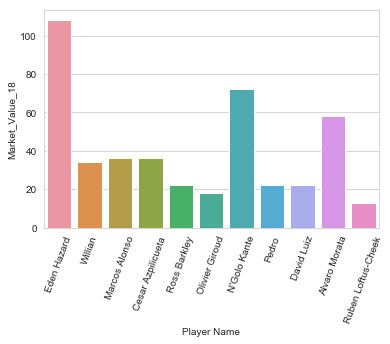

In [41]:
sns.set_style("whitegrid")
g = sns.barplot(x ='Player Name',y = 'Market_Value_18',data = data_chel )
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

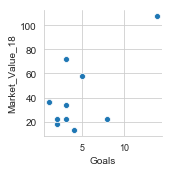

In [42]:
sns.pairplot(data_chel,x_vars = 'Goals',y_vars = 'Market_Value_18')

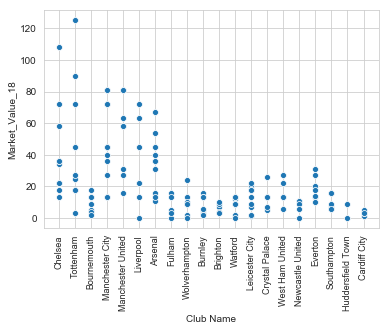

In [43]:
g = sns.scatterplot(x ='Club Name',y = 'Market_Value_18',data = EPL_combined_copy,ci = None )
plt.xticks(rotation = 90)
plt.rcParams["xtick.labelsize"] = 9

In [44]:
EPL_combined_copy.drop(columns = 'Unnamed: 0',axis = 1,inplace = True)

In [45]:
EPL_combined_copy.head()

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name
0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,2.6,3.3,12,4,27,28,LW,108,135,Chelsea
1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,2.1,0.4,10,10,24,27,AM,72,76,Tottenham
2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,2.2,0.6,5,3,30,25,LW,5,16,Bournemouth
3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,1.4,2.0,10,15,19,23,LW,81,90,Manchester City
4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,1.6,1.7,6,10,28,26,CM,81,81,Manchester United


In [46]:
EPL_combined_copy[(EPL_combined_copy['Age'] == 0)]

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name
129,Mathias Jorgensen,MathHUD,HUD,3,1,1440,4,9,0.0,0.0,0,0,0,0,AM,0,0,Huddersfield Town
135,Virgil van Dijk,VirgLIV,LIV,3,1,2070,7,26,0.0,0.0,0,0,0,0,CB,0,0,Liverpool
136,Ciaran Clark,CiarNEW,NEW,3,0,372,3,7,0.0,0.0,0,0,0,0,CB,0,0,Newcastle United
137,Willy Boly,WillWLV,WLV,3,0,1818,5,15,0.0,0.0,0,0,0,0,CB,0,0,Wolverhampton
140,Craig Cathcart,CraiWAT,WAT,3,0,1803,4,10,0.0,0.0,0,0,0,0,CB,0,0,Watford


In [47]:
EPL_combined_copy.drop(EPL_combined_copy.index[[129,135,136,137,140]])
EPL_combined_copy.head()

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name
0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,2.6,3.3,12,4,27,28,LW,108,135,Chelsea
1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,2.1,0.4,10,10,24,27,AM,72,76,Tottenham
2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,2.2,0.6,5,3,30,25,LW,5,16,Bournemouth
3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,1.4,2.0,10,15,19,23,LW,81,90,Manchester City
4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,1.6,1.7,6,10,28,26,CM,81,81,Manchester United


In [48]:
Sub = EPL_combined_copy[(EPL_combined_copy['Position'].isin(['CB','RB','LB']))]


In [49]:
list_val = Sub.index.values.tolist()

In [50]:
EPL_combined_copy.drop(EPL_combined_copy.index[list_val],inplace = True)
EPL_combined_copy.shape

(109, 18)

In [51]:
EPL_combined_copy.reset_index(drop = True,inplace = True)

In [52]:
EPL_combined_copy.shape

(109, 18)

In [53]:
EPL_combined_copy['stats_19'] = EPL_combined_copy['Goals'] + EPL_combined_copy['Assists']

In [54]:
EPL_combined_copy['stats_18'] = EPL_combined_copy['Goals_18'] + EPL_combined_copy['Assists_18']

In [55]:
EPL_combined_copy.head()

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name,stats_19,stats_18
0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,2.6,3.3,12,4,27,28,LW,108,135,Chelsea,26,16
1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,2.1,0.4,10,10,24,27,AM,72,76,Tottenham,17,20
2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,2.2,0.6,5,3,30,25,LW,5,16,Bournemouth,16,8
3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,1.4,2.0,10,15,19,23,LW,81,90,Manchester City,18,25
4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,1.6,1.7,6,10,28,26,CM,81,81,Manchester United,20,16


C:\Users\91997\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


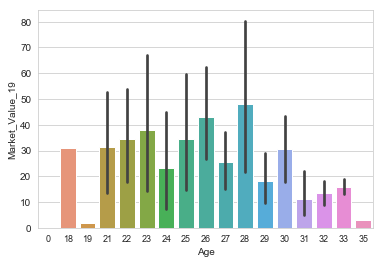

In [56]:
sns.barplot(x = 'Age',y = 'Market_Value_19',data = EPL_combined_copy)

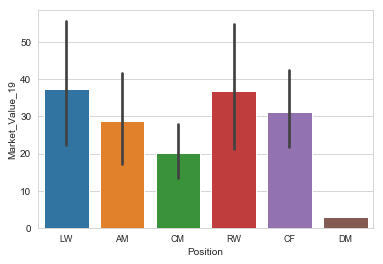

In [57]:
sns.barplot(x = 'Position',y = 'Market_Value_19',data = EPL_combined_copy)

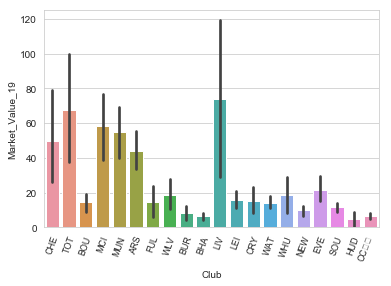

In [58]:
sns.barplot(x = 'Club',y = 'Market_Value_19',data = EPL_combined_copy)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

In [59]:
EPL_combined_copy[(EPL_combined_copy['Age'] == 0)]

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Key Passes,Dribbles,Goals_18,Assists_18,GamesPlayed,Age,Position,Market_Value_18,Market_Value_19,Club Name,stats_19,stats_18
103,Mathias Jorgensen,MathHUD,HUD,3,1,1440,4,9,0.0,0.0,0,0,0,0,AM,0,0,Huddersfield Town,4,0


In [60]:
EPL_combined_copy.drop(EPL_combined_copy.index[103],inplace = True)

In [61]:
EPL_combined_copy.reset_index(drop = True,inplace = True)

In [62]:
EPL_combined_copy.shape

(108, 20)

In [63]:
EPL_combined_copy['Age'].unique()

array([28, 27, 25, 23, 26, 24, 18, 30, 32, 29, 33, 22, 21, 31, 19, 35],
      dtype=int64)

In [64]:
Age_GB = EPL_combined_copy.groupby('Age').agg({"Market_Value_18":"mean"})

In [65]:
Age_GB

,Market_Value_18
Age,
18,0.000000
19,2.000000
21,25.200000
22,32.500000
23,34.000000
24,17.000000
25,31.100000
26,34.500000
27,21.400000


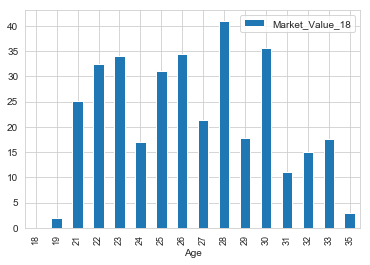

In [66]:
Age_GB.plot(kind = 'bar')

In [67]:
Club_GB = EPL_combined_copy.groupby('Club').agg({"Market_Value_18":"mean"})

In [68]:
Club_GB

,Market_Value_18
Club,
ARS,45.500000
BHA,5.750000
BOU,9.800000
BUR,7.500000
CC\r\r\n,3.000000
CHE,43.375000
CRY,12.800000
EVE,20.500000
FUL,7.400000


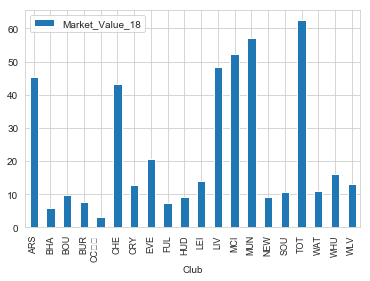

In [69]:
Club_GB.plot(kind = 'bar')

In [70]:
Position_GB = EPL_combined_copy.groupby('Position').agg({"Market_Value_18":"mean"})

In [71]:
Position_GB

,Market_Value_18
Position,
AM,28.538462
CF,29.400000
CM,17.533333
DM,3.000000
LW,33.000000
RW,28.058824


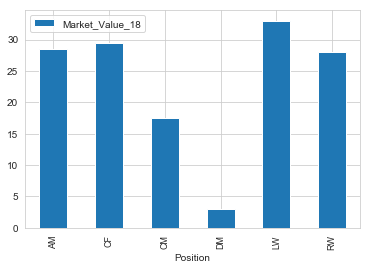

In [72]:
Position_GB.plot(kind = 'bar')

In [73]:
def pos_range(row):
    if row['Position'] == 'LW':
        val = 1
    if row['Position'] == 'CF':
        val = 2
    if row['Position'] == 'AM':
        val = 3
    if row['Position'] == 'RW':
        val = 4
    if row['Position'] == 'CM':
        val = 5
    if row['Position'] == 'DM':
        val = 6
    return val
    
    

In [74]:
EPL_combined_copy['Position_R'] = EPL_combined_copy.apply(pos_range,axis = 1)

In [75]:
EPL_combined_copy['Club Name'].unique()

array(['Chelsea', 'Tottenham', 'Bournemouth', 'Manchester City',
       'Manchester United', 'Arsenal', 'Fulham', 'Wolverhampton',
       'Burnley', 'Brighton', 'Liverpool', 'Leicester City',
       'Crystal Palace', 'Watford', 'West Ham United', 'Newcastle United',
       'Everton', 'Southampton', 'Huddersfield Town', 'Cardiff City'],
      dtype=object)

In [76]:
def club_range(row):
    if row['Club Name'] in ('Tottenham','Manchester United','Manchester City'):
        val = 1
    if row['Club Name'] in ('Liverpool','Chelsea','Arsenal'):
        val = 2
    if row['Club Name'] in ('Everton','West Ham United','Wolverhampton','Southampton','Watford','Crystal Palace','Bournemouth','Leicester City'):
        val = 3
    if row['Club Name'] in ('Newcastle United','Brighton','Burnley','Cardiff City','Fulham','Huddersfield Town'):
        val = 4
    return val
        

In [77]:
EPL_combined_copy['Club_R'] = EPL_combined_copy.apply(club_range,axis = 1)

In [78]:
def age_range(row):
    if row['Age'] in (28,30,26,25,23,22):
        val=1
    if row['Age'] in (21,27):
        val = 2
    if row['Age'] in (31,32,33,29,24):
        val = 3
    if row['Age'] in (18,19,35):
        val = 4
    return val
    

In [79]:
EPL_combined_copy['Age_R'] = EPL_combined_copy.apply(age_range,axis = 1)

In [80]:
EPL_combined_copy.columns


Index(['Player Name', 'PlayerID', 'Club', 'Goals', 'Assists', 'Minutes Played',
       'SOG', 'Shots', 'Key Passes', 'Dribbles', 'Goals_18', 'Assists_18',
       'GamesPlayed', 'Age', 'Position', 'Market_Value_18', 'Market_Value_19',
       'Club Name', 'stats_19', 'stats_18', 'Position_R', 'Club_R', 'Age_R'],
      dtype='object')

In [81]:
EPL_combined_copy.columns

Index(['Player Name', 'PlayerID', 'Club', 'Goals', 'Assists', 'Minutes Played',
       'SOG', 'Shots', 'Key Passes', 'Dribbles', 'Goals_18', 'Assists_18',
       'GamesPlayed', 'Age', 'Position', 'Market_Value_18', 'Market_Value_19',
       'Club Name', 'stats_19', 'stats_18', 'Position_R', 'Club_R', 'Age_R'],
      dtype='object')

In [82]:
def Club_val_EPL(row):
    if row['Club'] == 'CHE':
        val = 1
    if row['Club'] == 'TOT':
        val = 2
    if row['Club'] == 'BOU':
        val = 3
    if row['Club'] == 'MCI':
        val = 4
    if row['Club'] == 'MUN':
        val = 5
    if row['Club'] == 'LIV':
        val = 6
    if row['Club'] == 'ARS':
        val = 7
    if row['Club'] == 'FUL':
        val = 8
    if row['Club'] == 'WLV':
        val = 9
    if row['Club'] == 'LEI':
        val = 10
    if row['Club'] == 'CRY':
        val = 11
    if row['Club'] == 'WHU':
        val = 12
    if row['Club'] == 'NEW':
        val = 13
    if row['Club'] == 'EVE':
        val = 14
    if row['Club'] == 'SOU':
        val = 15
    if row['Club'] == 'HUD':
        val = 16
    if row['Club'] == 'CC\r\r\n':
        val = 17
    if row['Club'] == 'BUR':
        val = 18
    if row['Club'] == 'BHA':
        val = 19
    if row['Club'] == 'WAT':
        val = 20
    return val

In [83]:
EPL_combined_copy['Club_val'] = EPL_combined_copy.apply(Club_val_EPL,axis = 1)

In [84]:
EPL_combined_copy.columns

Index(['Player Name', 'PlayerID', 'Club', 'Goals', 'Assists', 'Minutes Played',
       'SOG', 'Shots', 'Key Passes', 'Dribbles', 'Goals_18', 'Assists_18',
       'GamesPlayed', 'Age', 'Position', 'Market_Value_18', 'Market_Value_19',
       'Club Name', 'stats_19', 'stats_18', 'Position_R', 'Club_R', 'Age_R',
       'Club_val'],
      dtype='object')

In [85]:
features = EPL_combined_copy.iloc[:,[3,4,10,11,13,15,20,21]].values
label = EPL_combined_copy.iloc[:,16].values
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.3,random_state = 0,shuffle = False)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)


In [86]:
y_test

array([16, 10, 13, 16, 20, 13,  9, 31, 16,  9,  6, 13, 36, 36, 13, 45, 90,
       13,  5,  5, 45, 18, 11, 18, 22,  9,  9,  5,  3,  9, 36,  7,  7],
      dtype=int64)

In [87]:
y_pred

array([11.34732503, 11.88565034, 14.54102254,  8.06929858, 22.75449107,
       11.01337358, 10.05223996, 39.34926834, 14.11700917,  8.09586024,
        5.95047298, 11.93505531, 35.05158416, 32.77447834,  4.66861582,
       55.39611958, 91.96679384, 10.63670578,  6.1668418 ,  6.73413791,
       35.40405214, 15.00252917, 11.39359934, 15.28709773, 14.86568007,
        6.74666635,  6.13318512, -1.90965299, -0.42889931, 11.15957018,
       28.68108035, -1.10056629,  3.93012306])

In [88]:
AllData.head()

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Club Name,League
0,Eden Hazard,EdenCHE,CHE,14,12,1788,36,79,Chelsea,Premier League
1,Christian Eriksen,ChriTOT,TOT,6,11,1691,27,64,Tottenham,Premier League
2,Ryan Fraser,RyanBOU,BOU,6,10,1883,21,35,Bournemouth,Premier League
3,Leroy Sane,LeroMCI,MCI,9,9,1233,20,49,Manchester City,Premier League
4,Paul Pogba,PaulMUN,MUN,11,9,1686,43,85,Manchester United,Premier League


In [89]:
AllData.groupby('League').agg({"Goals":"sum"})

,Goals
League,
Bundesliga,580
Laliga,577
League1,581
Premier League,761
Serie A,631


In [90]:
SerieA_combined.iloc[0:60,:]

,Unnamed: 0,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots
0,0,Papu Gomez,PapuATA,ATA,6,10,1592,29,82
1,1,Jose Callejon,JoseNAP,NAP,3,9,1525,11,43
2,2,Suso,SusoMIL,MIL,5,8,1653,31,74
3,3,Dries Mertens,DrieNAP,NAP,10,8,1213,25,63
4,4,Manuel Lazzari,ManuSPL,SPL,0,7,1409,7,28
5,5,Fabio Quagliarella,FabiSMP,SMP,21,7,1764,46,103
6,6,Cristiano Ronaldo,CrisJUV,JUV,19,7,1429,60,153
7,7,Josip Ilicic,JosiATA,ATA,9,6,1371,24,69
8,8,Cristiano Biraghi,CrisFIO,FIO,1,6,1800,6,31
9,9,Mario Mandzukic,MariJUV,JUV,8,6,1292,16,30


In [91]:
SerieA_half = SerieA_combined.iloc[0:60,:]

In [92]:
SerieA_half.shape

(60, 9)

In [93]:
Goals_18 = [0,10,6,18,2,19,26,0,0,5,6,8,7,0,11,10,1,0,0,10,0,0,4,0,11,11,16,3,4,3,0,12,0,0,3,0,0,0,4,0,0,9,0,10,14,29,3,0,4,22,15,5,29,0,4,10,11,0,7,1]
Assists_18 = [0,10,7,6,1,6,5,0,0,3,7,11,1,0,4,5,1,0,0,4,0,0,2,5,9,14,4,4,7,0,0,8,2,0,8,0,0,0,2,2,0,2,0,10,4,1,2,0,6,5,5,0,9,0,5,4,0,0,4,0]
Market_Value_18 = [0,24,35,28,6,2,100,0,0,20,27,60,20,0,20,15,10,0,0,22,0,0,1,9,40,22,25,28,6,9,0,13,2,0,10,0,0,0,20,10,0,20,0,20,25,95,21,0,40,110,15,20,45,0,9,38,9,0,22,10]
Market_Value_19 = [0,20,45,30,15,2,100,0,0,25,22,75,35,0,35,20,13,0,0,30,0,0,1,9,35,30,23,35,18,13,0,18,2,0,10,0,0,0,18,18,0,25,0,25,23,90,25,0,45,100,40,35,50,0,10,30,10,0,26,12]
Age = [0,32,25,31,25,36,34,0,0,32,25,27,21,0,28,19,24,0,0,25,0,0,37,27,30,26,33,22,24,23,0,29,28,0,28,0,0,0,24,26,0,24,0,26,23,26,27,0,25,25,23,25,29,0,23,25,30,0,26,27]
Position = ['CB','RW','RW','CF','CM','CF','LW','CB','CB','CF','LW','LW','RW','CB','CF','LW','CF','CB','CB','RW','CB','CB','CF','AM','LW','AM','CF','CM','LW','CM','CB','RW','CM','CB','AM','CB','CB','CB','RW','CM','CB','CM','CB','RW','CF','CF','CM','CB','RW','CF','CF','CF','CF','CB','CF','CF','CF','CB','LW','CF'] 
print(len(Goals_18))
print(len(Assists_18 ))
print(len(Market_Value_18))
print(len(Market_Value_19))
print(len(Age))
print(len(Position))

60
60
60
60
60
60


In [94]:
SerieA_half['Goals_18'] = Goals_18
SerieA_half['Assists_18'] = Assists_18
SerieA_half['Market_Value_18'] = Market_Value_18
SerieA_half['Market_Value_19'] = Market_Value_19
SerieA_half['Age'] = Age
SerieA_half['Position'] = Position

C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [95]:
SerieA_half.columns

Index(['Unnamed: 0', 'Player Name', 'PlayerID', 'Club', 'Goals', 'Assists',
       'Minutes Played', 'SOG', 'Shots', 'Goals_18', 'Assists_18',
       'Market_Value_18', 'Market_Value_19', 'Age', 'Position'],
      dtype='object')

In [96]:
Bundesliga_combined.iloc[70:81,[0,1,2,3,4,5]]

,Unnamed: 0,Player Name,PlayerID,Club,Goals,Assists
70,70,Leon Bailey,LeonLEV,LEV,5,1
71,71,Daniel Ginczek,DaniWOL,WOL,5,1
72,72,Rouwen Hennings,RouwDUS,DUS,5,2
73,73,Martin Harnik,MartBRE,BRE,4,1
74,74,Karim Onisiwo,KariMAI,MAI,4,0
75,75,Adam Szalai,AdamHOF,HOF,4,2
76,76,Willi Orban,WillRBL,RBL,4,0
77,77,Marco Richter,MarcAUG,AUG,0,3
78,78,Nico Schulz,NicoHOF,HOF,1,3
79,79,Ludwig Augustinsson,LudwBRE,BRE,1,3


In [97]:
Goals_18 = [1,9,10,1,9,6,8,5,29,6,0,10,2,0,7,0,4,0,0,1,0,10,14,10,0,0,0,0,2,0,10,2,13,2,2,0,6,1,1,3,10,4,0,2,2,1,10,0,2,4,4,4,13,16,12,1,4,1,1,15,0,10,7,0,1,1,1,0,1,12,9] 
Assists_18 = [4,3,5,10,4,6,14,1,2,1,0,0,3,0,0,3,6,0,0,1,0,5,2,8,3,3,1,0,2,0,2,2,7,5,3,2,2,3,3,8,8,2,0,1,0,3,2,0,0,1,3,2,6,5,3,0,1,0,0,1,0,5,11,0,0,2,0,0,2,3,6]
Market_Value_18 = [20,45,22,55,11,12,60,6,76,2,0,10,16,0,31,3,2,0,0,18,0,10,19,2,7,3,2,0,10,0,2,22,22,8,9,7,9,4,25,54,36,10,6,2,9,6,6,0,6,3,13,9,24,16,9,7,5,2,6,11,3,18,63,0,3,6,4,1,6,3,40]
Market_Value_19 = [80,45,45,60,40,10,40,15,63,21,0,18,16,0,45,3,4,0,0,20,0,50,22,31,5,11,7,0,22,0,15,22,58,15,22,3,31,9,10,58,63,45,18,2,10,3,15,0,11,5,36,27,31,34,13,13,7,2,15,9,5,40,58,0,9,4,7,15,9,3,31]
Age = [19,22,26,24,24,31,29,26,30,22,0,24,26,0,29,31,25,0,0,25,0,21,26,22,26,26,28,0,25,0,24,27,23,23,22,31,25,26,23,19,28,24,20,33,24,27,26,0,25,25,25,24,27,26,30,13,27,34,22,30,21,23,27,0,22,33,28,19,27,33,21]
Position = ['RW','AM','LW','CM','CF','CF','AM','CM','CF','CM','CB','CF','AM','CB','AM','CM','AM','CB','CB','LW','CB','CF','CF','CF','LW','CM','DM','CB','CM','CB','CF','LW','CF','CM','CM','CM','CF','DM','RW','AM','CM','CM','CM','CM','CM','LW','CF','CB','RW','CF','CF','CF','CF','LW','RW','AM','CF','CF','LW','CF','RW','LW','AM','CB','CF','CF','AM','RW','DM','LW','LW']
print(len(Goals_18))
print(len(Assists_18 ))
print(len(Market_Value_18))
print(len(Market_Value_19))
print(len(Age))
print(len(Position))

71
71
71
71
71
71


In [98]:
Bundesliga_half = Bundesliga_combined.iloc[0:71,:]

In [99]:
#Bundesliga_half

In [100]:
Bundesliga_half['Goals_18'] = Goals_18
Bundesliga_half['Assists_18'] = Assists_18
Bundesliga_half['Market_Value_18'] = Market_Value_18
Bundesliga_half['Market_Value_19'] = Market_Value_19
Bundesliga_half['Age'] = Age
Bundesliga_half['Position'] = Position


C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [101]:
Bundesliga_half.shape

(71, 15)

In [102]:
Laliga_combined.iloc[50:60,[1,2,3,4,5]]

,Player Name,PlayerID,Club,Goals,Assists
50,Charles,CharEIB,EIB,13,1
51,Raul De Tomas,RaulRV\r\r\n,RV\r\r\n,12,1
52,Borja Iglesias,BorjESP,ESP,12,2
53,Mikel Oyarzabal,MikeRSO,RSO,11,1
54,Roger Marti,RogeLEV,LEV,11,0
55,Willian Jose,WillRSO,RSO,9,2
56,Andre Silva,AndrSEV,SEV,9,0
57,Gareth Bale,GareRMD,RMD,8,2
58,Karl Toko Ekambi,KarlVIL,VIL,8,0
59,Youssef En-Nesyri,YousLGN,LGN,8,2


In [103]:
Goals_18 = [34,0,6,0,1,0,19,1,25,0,9,0,22,5,1,16,1,4,1,1,1,0,6,6,3,1,7,7,3,1,0,0,4,7,1,1,0,0,17,3,0,2,0,1,10,0,6,5,0,21,0,0,5,12,3,15,5,16,10,4]
Assists_18 = [12,0,5,0,1,0,9,7,12,0,3,0,5,10,6,4,4,3,0,4,0,0,2,4,2,7,7,6,6,5,1,0,4,4,2,1,0,0,4,1,0,5,0,1,1,0,6,7,0,0,0,0,1,5,2,4,4,2,4,0]
Market_Value_18 = [162,2,18,0,3,0,90,50,63,2,25,0,22,36,22,36,27,5,4,4,1,1,31,3,1,4,3,27,72,45,1,0,63,1,1,22,0,3,18,2,0,3,0,3,8,0,67,72,1,6,0,5,9,31,2,22,19,81,10,5]  
Market_Value_19 = [144,9,31,0,18,0,135,50,54,9,31,0,18,36,22,27,31,5,3,9,2,4,16,9,2,6,4,27,108,45,3,0,63,1,4,22,0,3,31,6,0,7,0,3,5,0,72,72,6,9,0,9,18,36,9,22,31,63,12,9]
Age = [31,27,26,0,22,0,28,27,32,30,28,0,31,31,33,28,22,27,33,25,28,24,31,24,33,30,29,24,21,31,21,0,27,37,24,27,0,31,22,29,0,28,0,22,32,0,23,29,20,32,0,24,26,22,28,27,23,29,26,21]
Position = ['RW','LW','AM','CB','RW','CB','CF','DM','CF','CF','CF','CB','CF','CF','CM','CF','CM','LW','CM','CM','AM','AM','CM','CM','RW','CM','RW','CM','LW','CM','AM','CB','CM','CF','RW','DM','CB','AM','CF','CF','CB','AM','CB','LW','AM','CB','LW','CM','AM','CF','CB','CF','CF','LW','CF','CF','CF','RW','CF','CF'] 
print(len(Goals_18))
print(len(Assists_18 ))
print(len(Market_Value_18))
print(len(Market_Value_19))
print(len(Age))
print(len(Position))

60
60
60
60
60
60


In [104]:
Laliga_half = Laliga_combined.iloc[0:60,:]

In [105]:
Laliga_half['Goals_18'] = Goals_18
Laliga_half['Assists_18'] = Assists_18
Laliga_half['Market_Value_18'] = Market_Value_18
Laliga_half['Market_Value_19'] = Market_Value_19
Laliga_half['Age'] = Age
Laliga_half['Position'] = Position

C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [106]:
Laliga_half.shape

(60, 15)

In [107]:
Ligue1_combined.iloc[50:60,[1,2,3,4,5]]

,Player Name,PlayerID,Club,Goals,Assists
50,Radamel Falcao,RadaMON,MON,12,2
51,Emiliano Sala,EmilNTE,NTE,12,2
52,Wahbi Khazri,WahbETI,ETI,12,2
53,Moussa Dembele,MousLYO,LYO,12,3
54,Francois Kamano,FranBDX,BDX,9,1
55,Stephane Bahoken,StepANG,ANG,9,2
56,Lebo Mothiba,LeboLIL,LIL,9,2
57,Remi Oudin,RemiREI,REI,9,2
58,Rafael Leao,RafaLIL,LIL,8,1
59,Houssem Aouar,HousLYO,LYO,7,2


In [108]:
Goals_18 = [3,11,13,19,5,0,5,4,9,22,4,19,6,6,5,0,5,13,2,0,0,18,1,0,10,3,0,8,0,0,1,0,1,0,1,0,3,7,1,0,0,0,0,0,0,0,0,1,3,28,18,0,9,19,8,1,5,1,1,6]
Assists_18 = [4,6,4,13,3,0,5,3,3,11,5,13,5,13,3,2,2,8,6,0,0,8,1,0,7,2,0,1,0,0,2,0,4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,6,4,0,2,4,4,5,0,2,1,5]
Market_Value_18 = [4,36,9,25,3,2,4,2,10,45,31,162,22,19,12,2,2,108,1,0,4,54,4,0,10,4,0,6,0,0,1,0,2,4,25,0,3,4,4,0,0,0,0,0,0,0,0,8,18,54,11,0,9,6,63,3,3,1,4,31]
Market_Value_19 = [11,40,36,45,7,9,9,9,12,45,31,162,45,18,24,6,5,180,11,0,9,63,8,0,11,4,0,7,0,0,5,0,3,9,18,0,7,4,8,0,0,0,0,0,0,0,0,13,22,45,11,0,15,18,12,6,7,6,10,36]
Age = [27,31,23,25,25,27,27,26,24,26,25,27,22,32,21,24,28,20,19,0,23,25,20,0,25,21,0,31,0,0,21,0,30,25,29,0,24,29,20,0,0,0,0,0,0,0,0,29,22,32,33,0,28,22,22,26,23,22,19,20]
Position = ['DM','RW','RW','CF','AM','CM','CF','LW','LW','RW','AM','LW','CM','AM','LW','DM','CF','CF','LW','CB','AM','AM','AM','CB','CM','CM','CB','LW','CB','CB','AM','CB','AM','CF','CM','CB','CF','CM','CF','CB','CB','CB','CB','CB','CB','CB','CB','AM','RW','CF','CF','CB','AM','CF','LW','CF','CF','RW','CF','CM']
print(len(Goals_18))
print(len(Assists_18 ))
print(len(Market_Value_18))
print(len(Market_Value_19))
print(len(Age))
print(len(Position))

60
60
60
60
60
60


In [109]:
Ligue1_half = Ligue1_combined.iloc[0:60,:]

In [110]:
Ligue1_half['Goals_18'] = Goals_18
Ligue1_half['Assists_18'] = Assists_18
Ligue1_half['Market_Value_18'] = Market_Value_18
Ligue1_half['Market_Value_19'] = Market_Value_19
Ligue1_half['Age'] = Age
Ligue1_half['Position'] = Position

C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91997\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [111]:
Ligue1_half.shape

(60, 15)

In [112]:
EPL_half = EPL_combined_copy

In [113]:
Ligue1_half.columns

Index(['Unnamed: 0', 'Player Name', 'PlayerID', 'Club', 'Goals', 'Assists',
       'Minutes Played', 'SOG', 'Shots', 'Goals_18', 'Assists_18',
       'Market_Value_18', 'Market_Value_19', 'Age', 'Position'],
      dtype='object')

In [114]:
EPL_half.columns

Index(['Player Name', 'PlayerID', 'Club', 'Goals', 'Assists', 'Minutes Played',
       'SOG', 'Shots', 'Key Passes', 'Dribbles', 'Goals_18', 'Assists_18',
       'GamesPlayed', 'Age', 'Position', 'Market_Value_18', 'Market_Value_19',
       'Club Name', 'stats_19', 'stats_18', 'Position_R', 'Club_R', 'Age_R',
       'Club_val'],
      dtype='object')

In [115]:
EPL_half.drop(columns = ['Key Passes', 'Dribbles','GamesPlayed','stats_19', 'stats_18', 'Position_R', 'Club_R', 'Age_R',
       'Club_val'],axis = 1,inplace = True)

In [116]:
EPL_half.columns

Index(['Player Name', 'PlayerID', 'Club', 'Goals', 'Assists', 'Minutes Played',
       'SOG', 'Shots', 'Goals_18', 'Assists_18', 'Age', 'Position',
       'Market_Value_18', 'Market_Value_19', 'Club Name'],
      dtype='object')

In [117]:
SerieA_half.shape

(60, 15)

In [118]:
SerieA_half.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)


C:\Users\91997\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [119]:
Bundesliga_half.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)
Laliga_half.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)
Ligue1_half.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [120]:
#Ligue1_half.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)

In [121]:
Bundesliga_half.shape

(71, 14)

In [122]:
Ligue1_half.shape

(60, 14)

In [123]:
Ligue1_half

,Player Name,PlayerID,Club,Goals,Assists,Minutes Played,SOG,Shots,Goals_18,Assists_18,Market_Value_18,Market_Value_19,Age,Position
0,Kenny Lala,KennSTR,STR,4,9,1530,7,20,3,4,4,11,27,DM
1,Angel Di Maria,AngePSG,PSG,9,9,1167,26,77,11,6,36,40,31,RW
2,Nicolas Pepe,NicoLIL,LIL,18,9,1795,48,94,13,4,9,36,23,RW
3,Memphis Depay,MempLYO,LYO,6,8,1412,37,84,19,13,25,45,25,CF
4,Adrien Thomasson,AdriSTR,STR,5,8,1384,13,40,5,3,3,7,25,AM
5,Teji Savanier,TejiNIM,NIM,4,8,1696,17,49,0,0,2,9,27,CM
6,Andy Delort,AndyMTP,MTP,11,7,1576,25,84,5,5,4,9,27,CF
7,Flavien Tait,FlavANG,ANG,4,6,1581,29,63,4,3,2,9,26,LW
8,Lucas Ocampos,LucaMAR,MAR,3,6,1562,17,47,9,3,10,12,24,LW
9,Florian Thauvin,FlorMAR,MAR,13,6,1534,33,78,22,11,45,45,26,RW


In [124]:
EPL_half.drop(columns = ['Club Name'],axis = 1,inplace = True)

In [125]:
EPL_half.shape

(108, 14)

In [126]:
AllData_half = EPL_half.append([SerieA_half,Bundesliga_half,Laliga_half,Ligue1_half],ignore_index = True)

C:\Users\91997\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [127]:
CB = AllData_half[AllData_half['Position'] == 'CB']

In [128]:
#CB

In [129]:
CB_val =CB.index.values.tolist()


In [130]:
CB_val =CB.index.values.tolist()
AllData_half.drop(AllData_half.index[CB_val],inplace = True)
AllData_half.reset_index(drop = True,inplace = True)

In [131]:
AllData_half.shape

(307, 14)

In [132]:
def Club_namee(row):
    if row['Club'] == 'CHE':
        val = 'Chelsea'
    if row['Club'] == 'TOT':
        val = 'Tottenham'
    if row['Club'] == 'BOU':
        val = 'Bournemouth'
    if row['Club'] == 'MCI':
        val = 'Manchester City'
    if row['Club'] == 'MUN':
        val = 'Manchester United'
    if row['Club'] == 'LIV':
        val = 'Liverpool'
    if row['Club'] == 'ARS':
        val = 'Arsenal'
    if row['Club'] == 'FUL':
        val = 'Fulham'
    if row['Club'] == 'WLV':
        val = 'Wolverhampton'
    if row['Club'] == 'LEI':
        val = 'Leicester City'
    if row['Club'] == 'CRY':
        val = 'Crystal Palace'
    if row['Club'] == 'WHU':
        val = 'West Ham United'
    if row['Club'] == 'NEW':
        val = 'Newcastle United'
    if row['Club'] == 'EVE':
        val = 'Everton'
    if row['Club'] == 'SOU':
        val = 'Southampton'
    if row['Club'] == 'HUD':
        val = 'Huddersfield Town'
    if row['Club'] == 'CC\r\r\n':
        val = 'Cardiff City'
    if row['Club'] == 'SPL':
        val = 'Spal'
    if row['Club'] == 'SMP':
        val = 'Sampdoria'
    if row['Club'] == 'JUV':
        val = 'Juventus'
    if row['Club'] == 'FIO':
        val = 'Fiorentina'
    if row['Club'] == 'ROM':
        val = 'Roma'
    if row['Club'] == 'LAZ':
        val = 'Lazio'
    if row['Club'] == 'GEN':
        val = 'Genoa'
    if row['Club'] == 'SAS':
        val = 'Sassuolo'
    if row['Club'] == 'INT':
        val = 'Inter Milan'
    if row['Club'] == 'EMP':
        val = 'Empoli'
    if row['Club'] == 'CAG':
        val = 'Cagliari'
    if row['Club'] == 'PAR':
        val = 'Parma'
    if row['Club'] == 'FRO':
        val = 'Frosinone'
    if row['Club'] == 'CHV':
        val = 'Chievo Verona'
    if row['Club'] == 'BUR':
        val = 'Burnley'
    if row['Club'] == 'BHA':
        val = 'Brighton'
    if row['Club'] == 'WAT':
        val = 'Watford'
    if row['Club'] == 'ATA':
        val = 'Atalanta'
    if row['Club'] == 'NAP':
        val = 'Napoli'
    if row['Club'] == 'MIL':
        val = 'Ac Milan'
    if row['Club'] == 'BGN':
        val = 'Bologna'
    if row['Club'] == 'UDN':
        val = 'Udinese'
    if row['Club'] == 'TOR':
        val = 'Torino'
    if row['Club'] == 'DOR':
        val = 'Dortmund'
    if row['Club'] == 'LEV':
        val = 'Bayer Leverkusen'
    if row['Club'] == 'BM\r\r\n':
        val = 'Monchengladbach'
    if row['Club'] == 'EF\r\r\n':
        val = 'Eintracht Frankfurt'
    if row['Club'] == 'BRE':
        val = 'Werder Bremen'
    if row['Club'] == 'RBL':
        val = 'RB Leipzig'
    if row['Club'] == 'HB\r\r\n':
        val = 'Hertha Berlin'
    if row['Club'] == 'DUS':
        val = 'Dusseldorf'
    if row['Club'] == 'MAI':
        val = 'Mainz'
    if row['Club'] == 'HOF':
        val = 'Hoffenheim'
    if row['Club'] == 'FBG':
        val = 'Freiburg'
    if row['Club'] == 'AUG':
        val = 'Augsburg FC'
    if row['Club'] == 'SGT':
        val = 'Stuttgart'
    if row['Club'] == 'SKE':
        val = 'Schalke'
    if row['Club'] == 'WOL':
        val = 'Wolfsburg'
    if row['Club'] == 'HAN':
        val = 'Hannover'
    if row['Club'] == 'FCN':
        val = 'Nurnberg FC'
    if row['Club'] == 'BAR':
        val = 'Barcelona'
    if row['Club'] == 'ALA':
        val = 'Alaves'
    if row['Club'] == 'SEV':
        val = 'Sevilla'
    if row['Club'] == 'CEL':
        val = 'Celta vigo'
    if row['Club'] == 'VIL':
        val = 'Villarreal'
    if row['Club'] == 'ATL':
        val = 'Atletico Madrid'
    if row['Club'] == 'GET':
        val = 'Getafe'
    if row['Club'] == 'LGN':
        val = 'Leganes'
    if row['Club'] == 'RMD':
        val = 'Real Madrid'
    if row['Club'] == 'VAL':
        val = 'Valenica'
    if row['Club'] == 'BET':
        val = 'Real Betis'
    if row['Club'] == 'HUE':
        val = 'Huesca'
    if row['Club'] == 'EIB':
        val = 'Eibar'
    if row['Club'] == 'GIR':
        val = 'Girona'
    if row['Club'] == 'ATH':
        val = 'Athletic bilbao'
    if row['Club'] == 'ESP':
        val = 'Espanyol'
    if row['Club'] == 'RV\r\r\n':
        val = 'Rayo Vallecano'
    if row['Club'] == 'RSO':
        val = 'Real Sociedad'
    if row['Club'] == 'VLD':
        val = 'Valladolid'
    if row['Club'] == 'STR':
        val = 'Strasbourg'
    if row['Club'] == 'PSG':
        val = 'Paris Saint-German'
    if row['Club'] == 'LIL':
        val = 'Lille'
    if row['Club'] == 'LYO':
        val = 'Lyon'
    if row['Club'] == 'NIM':
        val = 'Nimes'
    if row['Club'] == 'MTP':
        val = 'Montpellier'
    if row['Club'] == 'ANG':
        val = 'Angers'
    if row['Club'] == 'MAR':
        val = 'Marseille'
    if row['Club'] == 'REN':
        val = 'Stade Rennais'
    if row['Club'] == 'ETI':
        val = 'Etienne'
    if row['Club'] == 'NTE':
        val = 'Nantes'
    if row['Club'] == 'GUI':
        val = 'Guingamp'
    if row['Club'] == 'TOU':
        val = 'Toulouse'
    if row['Club'] == 'CAE':
        val = 'Caen'
    if row['Club'] == 'AMN':
        val = 'Amiens'
    if row['Club'] == 'BDX':
        val = 'Bordeaux'
    if row['Club'] == 'NIC':
        val = 'Nice'
    if row['Club'] == 'MON':
        val = 'Monaco'
    if row['Club'] == 'REI':
        val = 'Reims'
    if row['Club'] == 'DIJ':
        val = 'Dijon'
    return val

In [133]:
AllData_half['Club Name'] = AllData_half.apply(Club_name,axis = 1)

In [134]:
print(len(AllData_half['Club Name'].unique()))

89


In [135]:
AllData_half[(AllData_half['Player Name'] == '')]

,Age,Assists,Assists_18,Club,Goals,Goals_18,Market_Value_18,Market_Value_19,Minutes Played,Player Name,PlayerID,Position,SOG,Shots,Club Name


In [136]:
def leagueNamee(row):
    if row['Club Name'] in ('Chelsea','Tottenham', 'Bournemouth', 'Manchester City', 'Manchester United',
 'Liverpool', 'Arsenal', 'Fulham', 'Wolverhampton', 'Burnley', 'Brighton',
 'Watford', 'Leicester City', 'Crystal Palace', 'West Ham United',
 'Newcastle United', 'Everton', 'Southampton', 'Huddersfield Town',
 'Cardiff City'):
        League_name = 'Premier League'
    if row['Club Name'] in ('Atalanta', 'Napoli', 'Ac Milan', 'Spal', 'Sampdoria',
 'Juventus', 'Fiorentina', 'Roma', 'Lazio', 'Genoa', 'Sassuolo', 'Inter Milan',
 'Bologna', 'Udinese', 'Torino', 'Empoli', 'Cagliari', 'Parma', 'Frosinone',
 'Chievo Verona'):
        League_name = 'Serie A'
    if row['Club Name'] in ('Dortmund', 'Bayer Leverkusen', 'Monchengladbach',
 'Eintracht Frankfurt', 'Werder Bremen', 'RB Leipzig', 'Hertha Berlin',
 'Dusseldorf', 'Mainz', 'Hoffenheim', 'Freiburg', 'Augsburg FC', 'Stuttgart',
 'Schalke', 'Wolfsburg', 'Hannover', 'Nurnberg FC'):
        League_name = 'Bundesliga'
    if row['Club Name'] in ('Barcelona', 'Alaves',
 'Sevilla', 'Celta vigo', 'Villarreal', 'Atletico Madrid', 'Getafe', 'Leganes',
 'Real Madrid', 'Valenica', 'Real Betis', 'Huesca', 'Eibar', 'Girona',
 'Athletic bilbao', 'Espanyol', 'Rayo Vallecano', 'Real Sociedad',
 'Valladolid'):
        League_name = 'Laliga'
    if row['Club Name'] in ('Strasbourg', 'Paris Saint-German', 'Lille', 'Lyon', 'Nimes',
 'Montpellier', 'Angers', 'Marseille', 'Stade Rennais', 'Etienne', 'Nantes',
 'Guingamp', 'Toulouse', 'Caen', 'Amiens', 'Bordeaux', 'Nice', 'Monaco', 'Reims',
 'Dijon'):
         League_name = 'League1'
    return League_name

In [137]:
AllData_half['League'] = AllData_half.apply(leagueNamee,axis = 1)

In [138]:
AllData_half['League'].unique()

array(['Premier League', 'Serie A', 'Bundesliga', 'Laliga', 'League1'],
      dtype=object)

In [139]:
AllData_half.to_csv('FinalProjectData.csv')

In [140]:
AllData_half.columns

Index(['Age', 'Assists', 'Assists_18', 'Club', 'Goals', 'Goals_18',
       'Market_Value_18', 'Market_Value_19', 'Minutes Played', 'Player Name',
       'PlayerID', 'Position', 'SOG', 'Shots', 'Club Name', 'League'],
      dtype='object')

In [141]:
Data = AllData_half[(AllData_half['League'] == 'Premier League')].nsmallest(10,['Market_Value_19'])

In [142]:
Data

,Age,Assists,Assists_18,Club,Goals,Goals_18,Market_Value_18,Market_Value_19,Minutes Played,Player Name,PlayerID,Position,SOG,Shots,Club Name,League
29,19,4,0,BUR,3,0,2,2,1074,Dwight McNeil,DwigBUR,LW,8,26,Burnley,Premier League
12,29,6,1,BUR,1,0,3,3,1637,Ashley Westwood,AshlBUR,DM,4,19,Burnley,Premier League
44,35,0,0,BHA,11,12,3,3,1375,Glenn Murray,GlenBHA,CF,20,43,Brighton,Premier League
103,24,0,1,FUL,3,3,3,3,537,Aboubakar Kamara,AbouFUL,CF,9,20,Fulham,Premier League
69,29,3,2,BOU,1,5,4,4,895,Junior Stanislas,JuniBOU,LW,8,29,Bournemouth,Premier League
25,31,5,1,CRY,2,5,5,5,1768,James McArthur,JameCRY,CM,6,26,Crystal Palace,Premier League
67,25,4,0,FUL,1,0,5,5,488,Luciano Vietto,LuciFUL,CF,7,22,Fulham,Premier League
93,24,2,0,CC\r\r\n,5,1,1,5,1453,Victor Camarasa,VictCC\r\r\n,CM,11,37,Cardiff City,Premier League
94,24,1,3,CC\r\r\n,4,1,3,5,1570,Callum Paterson,CallCC\r\r\n,CM,8,39,Cardiff City,Premier League
102,29,0,1,BUR,3,4,6,5,432,Sam Vokes,Sam BUR,CF,7,21,Burnley,Premier League


In [143]:
Data.groupby('Club').agg({"Market_Value_19":"max"})

,Market_Value_19
Club,
BHA,3
BOU,4
BUR,5
CC\r\r\n,5
CRY,5
FUL,5


C:\Users\91997\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


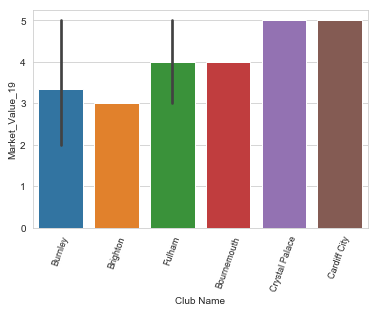

In [144]:
sns.barplot(x = 'Club Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

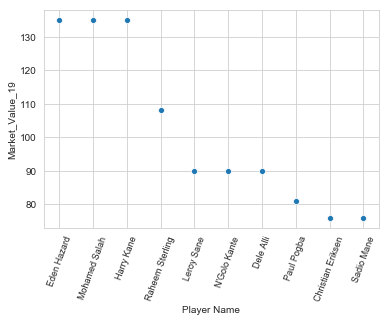

In [145]:
Data = AllData_half[(AllData_half['League'] == 'Premier League')].nlargest(10,['Market_Value_19'])
sns.scatterplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

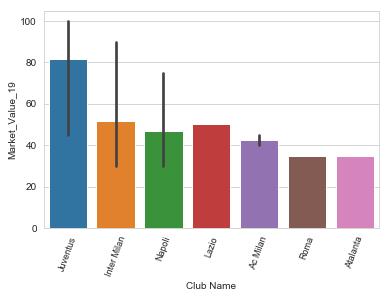

In [146]:
Data = AllData_half[(AllData_half['League'] == 'Serie A')].nlargest(15,['Market_Value_19'])
Data.groupby('Club').agg({"Market_Value_19":"max"})
sns.barplot(x = 'Club Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

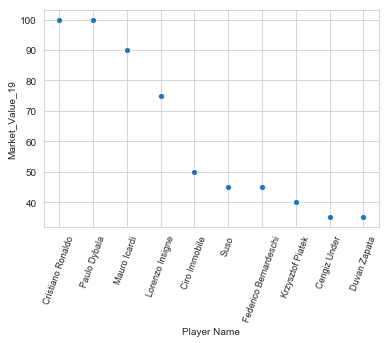

In [147]:
Data = AllData_half[(AllData_half['League'] == 'Serie A')].nlargest(10,['Market_Value_19'])
Data.groupby('Club Name').agg({"Market_Value_19":"max"})
sns.scatterplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

In [148]:
Data.groupby('Club').agg({"Market_Value_19":"max"})

,Market_Value_19
Club,
ATA,35
INT,90
JUV,100
LAZ,50
MIL,45
NAP,75
ROM,35


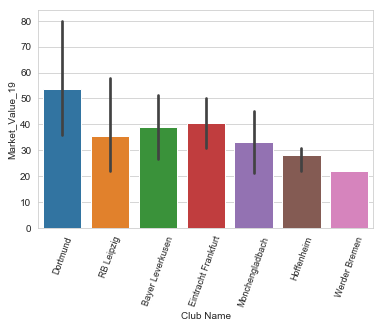

In [149]:
Data = AllData_half[(AllData_half['League'] == 'Bundesliga')].nlargest(20,['Market_Value_19'])
Data.groupby('Club').agg({"Market_Value_19":"max"})
sns.barplot(x = 'Club Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

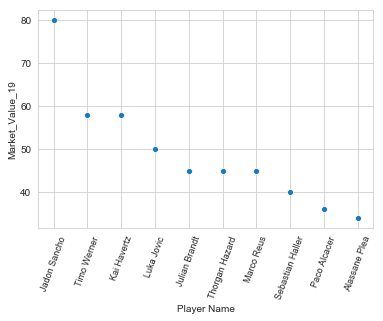

In [150]:
Data = AllData_half[(AllData_half['League'] == 'Bundesliga')].nlargest(10,['Market_Value_19'])
Data.groupby('Club Name').agg({"Market_Value_19":"max"})
sns.scatterplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

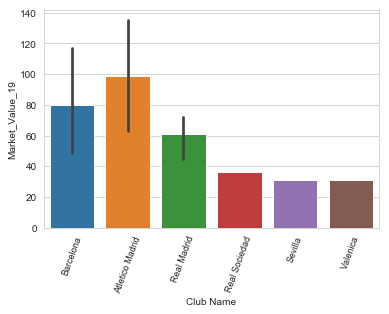

In [151]:
Data = AllData_half[(AllData_half['League'] == 'Laliga')].nlargest(15,['Market_Value_19'])
Data.groupby('Club').agg({"Market_Value_19":"max"})
sns.barplot(x = 'Club Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

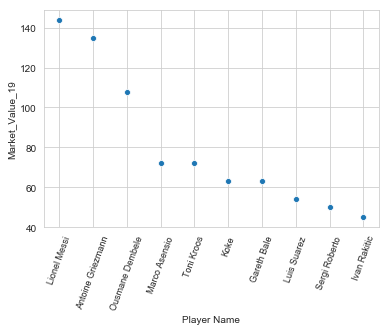

In [152]:
Data = AllData_half[(AllData_half['League'] == 'Laliga')].nlargest(10,['Market_Value_19'])
Data.groupby('Club Name').agg({"Market_Value_19":"max"})
sns.scatterplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

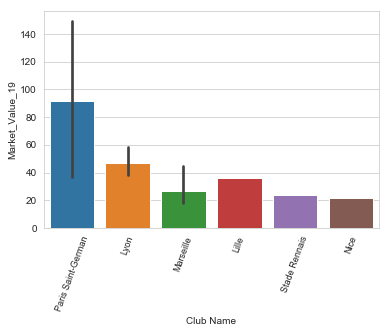

In [153]:
Data = AllData_half[(AllData_half['League'] == 'League1')].nlargest(15,['Market_Value_19'])
Data.groupby('Club').agg({"Market_Value_19":"max"})
sns.barplot(x = 'Club Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

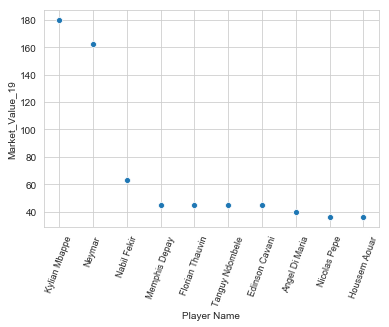

In [154]:
Data = AllData_half[(AllData_half['League'] == 'League1')].nlargest(10,['Market_Value_19'])
Data.groupby('Club Name').agg({"Market_Value_19":"max"})
sns.scatterplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

In [155]:
Data = AllData_half.nlargest(20,['Market_Value_19'])

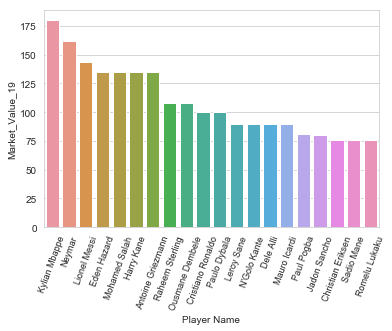

In [156]:
sns.barplot(x = 'Player Name',y = 'Market_Value_19',data = Data)
plt.xticks(rotation = 70)
plt.rcParams["xtick.labelsize"] = 9

In [157]:
Data = AllData_half[(AllData_half['Age'].isin([19,20,21,22]))]

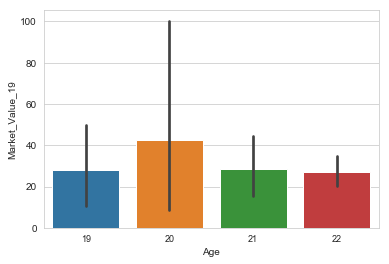

In [158]:
sns.barplot(x = 'Age',y = 'Market_Value_19',data = Data)

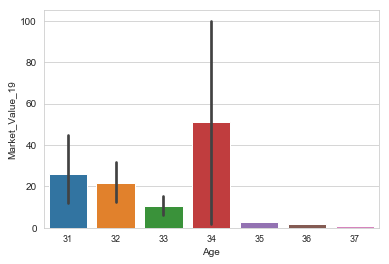

In [159]:
Data = AllData_half[(AllData_half['Age'].isin([31,32,33,34,35,36,37,38]))]
sns.barplot(x = 'Age',y = 'Market_Value_19',data = Data)

In [160]:
Data = AllData_half.groupby('Position').agg({"Market_Value_19":"mean"})

In [161]:
Data

,Market_Value_19
Position,
AM,22.558140
CF,28.316327
CM,21.434783
DM,14.625000
LW,34.489362
RW,32.880952


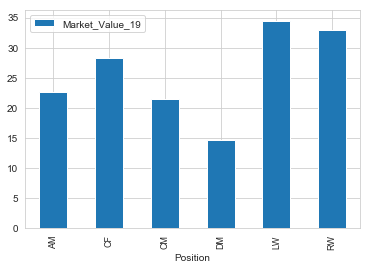

In [162]:
Data.plot(kind = 'bar')

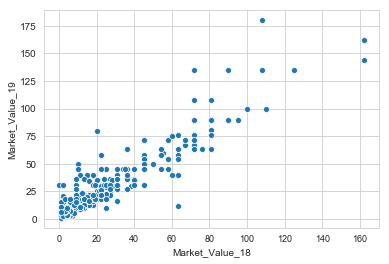

In [163]:
sns.scatterplot(x = 'Market_Value_18',y = 'Market_Value_19',data = AllData_half)

In [164]:
Data = AllData_half.groupby('Club Name').agg({"Market_Value_19":"mean"})

In [165]:
#Data['Market_Value_19']

In [166]:
Data.nsmallest(10,'Market_Value_19')

,Market_Value_19
Club Name,
Bologna,1.000000
Genoa,2.000000
Caen,3.000000
Guingamp,4.000000
Huesca,4.000000
Stuttgart,4.500000
Getafe,5.000000
Mainz,5.000000
Eibar,5.666667


In [167]:
def pos_range(row):
    if row['Position'] == 'LW':
        val = 34.4
    if row['Position'] == 'CF':
        val = 28.3
    if row['Position'] == 'AM':
        val = 22.5
    if row['Position'] == 'RW':
        val = 32.8
    if row['Position'] == 'CM':
        val = 21.4
    if row['Position'] == 'DM':
        val = 14.6
    return val

In [168]:
AllData_half['Position_R'] = AllData_half.apply(pos_range,axis = 1)

In [169]:
AllData_half.columns

Index(['Age', 'Assists', 'Assists_18', 'Club', 'Goals', 'Goals_18',
       'Market_Value_18', 'Market_Value_19', 'Minutes Played', 'Player Name',
       'PlayerID', 'Position', 'SOG', 'Shots', 'Club Name', 'League',
       'Position_R'],
      dtype='object')

In [170]:
Data

,Market_Value_19
Club Name,
Ac Milan,35.666667
Alaves,6.500000
Amiens,9.000000
Angers,7.500000
Arsenal,44.000000
Atalanta,35.000000
Athletic bilbao,11.666667
Atletico Madrid,99.000000
Augsburg FC,13.000000


In [171]:
AllData_half.iloc[0:5,[0,1,2,3]]

,Age,Assists,Assists_18,Club
0,28,12,4,CHE
1,27,11,10,TOT
2,25,10,3,BOU
3,23,9,15,MCI
4,26,9,10,MUN


In [186]:
AllData_half.columns

Index(['Age', 'Assists', 'Assists_18', 'Club', 'Goals', 'Goals_18',
       'Market_Value_18', 'Market_Value_19', 'Minutes Played', 'Player Name',
       'PlayerID', 'Position', 'SOG', 'Shots', 'Club Name', 'League',
       'Position_R'],
      dtype='object')

In [199]:
Regression_df = AllData_half[['Age','Assists','Assists_18','Goals','Goals_18','Market_Value_18','Market_Value_19']]

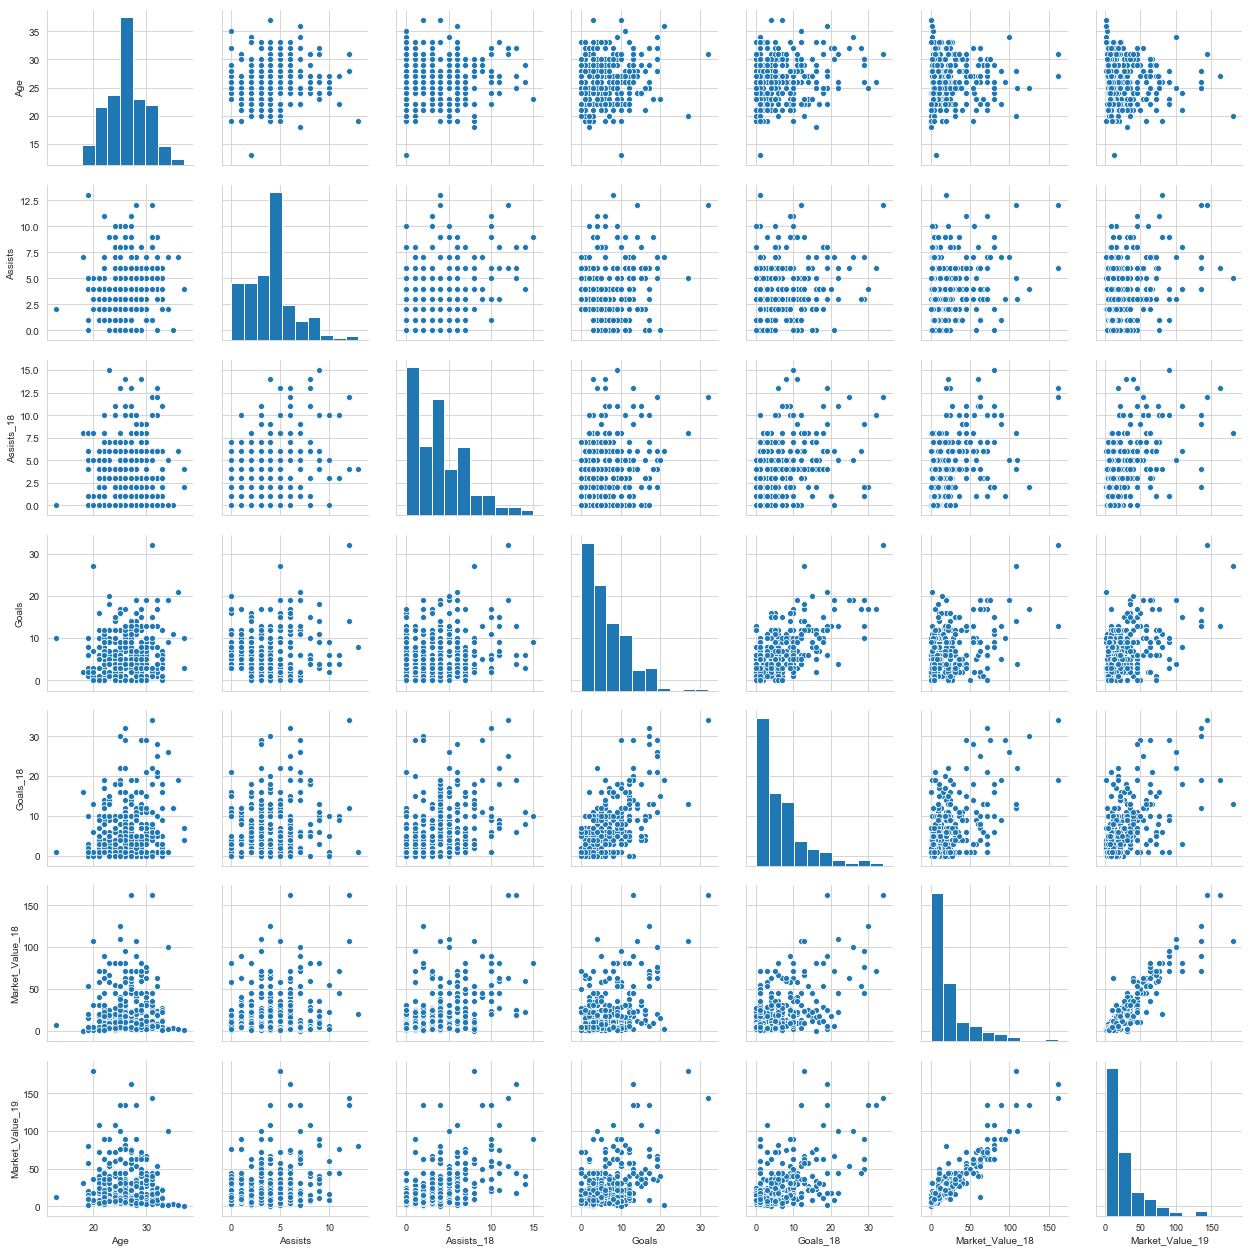

In [200]:
sns.pairplot(Regression_df)

In [215]:
print(AllData_half.corr())

                      Age   Assists  Assists_18     Goals  Goals_18  \
Age              1.000000  0.090067    0.086699  0.109015  0.194901   
Assists          0.090067  1.000000    0.323575  0.090737  0.174799   
Assists_18       0.086699  0.323575    1.000000  0.216271  0.428370   
Goals            0.109015  0.090737    0.216271  1.000000  0.637752   
Goals_18         0.194901  0.174799    0.428370  0.637752  1.000000   
Market_Value_18  0.046528  0.236732    0.506324  0.427548  0.571385   
Market_Value_19 -0.087903  0.312790    0.505170  0.493168  0.556336   
SOG              0.077428  0.171963    0.248913  0.876664  0.643266   
Shots            0.097675  0.205169    0.250232  0.774273  0.593208   
Position_R      -0.059145 -0.017408    0.116114  0.316244  0.289249   

                 Market_Value_18  Market_Value_19       SOG     Shots  \
Age                     0.046528        -0.087903  0.077428  0.097675   
Assists                 0.236732         0.312790  0.171963  0.205169   

In [216]:
features = AllData_half[['Assists','Assists_18','Goals','Goals_18','Market_Value_18','Shots','SOG']]
label = AllData_half['Market_Value_19']
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.2,random_state = 0,shuffle = False)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)


In [217]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 1.08350894  0.24338506  0.49107184 -0.08840703  0.89792584 -0.11670441
  0.31646417]


In [218]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test,y_pred))


Mean Absolute Error: 6.031332713921973
Mean Squared Error: 130.25172273439355
Root Mean Squared Error: 11.412787684627869
Variance score: 0.87


In [219]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
245,31,23.467687
246,6,5.352667
247,7,6.884200
248,3,4.776254
249,5,14.410913
250,72,63.740744
251,72,67.339353
252,6,4.561429
253,9,15.348300
254,9,13.249669


In [206]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 6.233585689919619
Mean Squared Error: 123.71628061061399
Root Mean Squared Error: 11.122782053542808


In [213]:
features_goals = AllData_half[['Age','Assists','Assists_18','Goals_18']]
label_goals = AllData_half['Goals']
x_train,x_test,y_train,y_test = train_test_split(features_goals,label_goals,test_size = 0.2,random_state = 0,shuffle = False)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [214]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test,y_pred))

Mean Absolute Error: 3.1035272264970764
Mean Squared Error: 17.6407576605999
Root Mean Squared Error: 4.200090196721958
Variance score: 0.36


In [212]:
df

,Actual,Predicted
245,10,11.419586
246,7,5.030851
247,1,3.476479
248,0,4.684508
249,6,7.737190
250,1,6.672522
251,0,4.628326
252,3,2.794451
253,17,13.627831
254,12,3.457868
